<a href="https://colab.research.google.com/github/lonecoder007/practice_projects/blob/master/house_price_pridection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# **Data** **Preparation**

In [ ]:
train=pd.read_csv('Train_Data.csv')
test=pd.read_csv('Test_Data.csv')

In [ ]:
print("Number of data points in train data:{0} and Number of features in train data:{1}".format(train.shape[0],train.shape[1]))
print("Number of data points in test data:{0} and Number of features in test data:{1}".format(test.shape[0],test.shape[1]))

Number of data points in train data:1100 and Number of features in train data:81
Number of data points in test data:360 and Number of features in test data:80


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1971,1971,Gable,CompShg,HdBoard,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,412,LwQ,287,251,950,GasA,TA,Y,SBrkr,950,0,0,950,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,45.0,TA,TA,CBlock,TA,TA,No,Rec,588,Unf,0,422,1010,GasA,Ex,Y,SBrkr,1134,0,0,1134,0,0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1960.0,RFn,1,254,TA,TA,Y,0,16,0,0,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655,Unf,0,0,655,GasA,Ex,Y,SBrkr,1194,0,0,1194,0,1,1,0,3,1,TA,6,Typ,1,Fa,BuiltIn,1954.0,Fin,2,539,TA,TA,Y,0,0,192,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,304.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [ ]:
target=train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [ ]:
dataframe=pd.concat([train,test])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 359
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [ ]:
dataframe.columns[dataframe.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataframe['LotFrontage'].fillna(value=dataframe['LotFrontage'].mean(),inplace=True)

In [ ]:
print(dataframe['LotFrontage'].shape)

(1460,)


In [ ]:
print(dataframe['MasVnrType'].value_counts())
print(dataframe['MasVnrType'].count())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
1452


In [ ]:
dataframe['MasVnrType'].fillna(value='None',inplace=True)

In [ ]:
dataframe['MasVnrType'].count()

1460

In [ ]:
print(dataframe['MasVnrArea'].value_counts())
print(dataframe['MasVnrArea'].count())

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
1452


In [ ]:
dataframe['MasVnrArea'].fillna(value=0.0,inplace=True)
print(dataframe['MasVnrArea'].count())

1460


In [ ]:
print(dataframe['Electrical'].value_counts())
print(dataframe['Electrical'].count())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1459


In [ ]:
dataframe['Electrical'].fillna(value='SBrkr',inplace=True)
print(dataframe['Electrical'].count())

1460


In [ ]:
print(dataframe['GarageYrBlt'].value_counts())
print(dataframe['GarageYrBlt'].count())

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
1379


In [ ]:
dataframe['GarageYrBlt'].fillna(value=dataframe['GarageYrBlt'].mean(),inplace=True)

In [ ]:
dataframe['GarageYrBlt'].shape

(1460,)

In [ ]:
miss_col=dataframe.columns[dataframe.isnull().any()].tolist()
miss_col

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for col in miss_col:
    dataframe[col].fillna(value='NA',inplace=True)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 359
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [ ]:
dataframe.drop(columns=['Id'],inplace=True)

In [ ]:
dataframe.shape

(1460, 79)

In [ ]:
col=dataframe.columns[dataframe.dtypes=='O']
col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
dataframe[col]=dataframe[col].apply(le.fit_transform)

In [ ]:
dataframe.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.000000,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.000000,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.000000,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.000000,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.000000,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4
5,50,3,85.000000,14115,1,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,4,4,2,732,6,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,3,1,1993.0,3,2,480,5,5,2,40,30,0,320,0,0,3,2,3,700,10,2009,8,4
6,20,3,75.000000,10084,1,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,4,0,2,1369,6,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004.0,2,2,636,5,5,2,255,57,0,0,0,0,3,4,1,0,8,2007,8,4
7,60,3,70.049958,10382,1,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,4,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,5,1,1973.0,2,2,484,5,5,2,235,204,228,0,0,0,3,4,3,350,11,2009,8,4
8,50,4,51.000000,6120,1,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,4,4,4,6,0,6,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,5,1931.0,3,2,468,1,5,2,90,0,205,0,0,0,3,4,1,0,4,2008,8,0
9,190,3,50.000000,7420,1,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,4,4,4,2,851,6,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,5,1,1939.0,2,1,205,2,5,2,0,4,0,0,0,0,3,4,1,0,1,2008,8,4


In [ ]:
x_train=dataframe[:1100]
x_test=dataframe[1100:]

In [ ]:
print(x_train.shape,x_test.shape)

(1100, 79) (360, 79)


In [ ]:
print(target)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1095    176432
1096    127000
1097    170000
1098    128000
1099    157000
Name: SalePrice, Length: 1100, dtype: int64


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
model=Sequential()
model.add(Dense(800,activation='relu',input_shape=(79,)))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               64000     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               240300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
hist=model.fit(x_train,target,batch_size=128,epochs=1000,validation_split=0.2)

Train on 880 samples, validate on 220 samples
Epoch 1/1000
880/880 [==============================] - 2s 2ms/step - loss: 40015737278.8364 - mae: 182893.8906 - val_loss: 35048055379.7818 - val_mae: 172569.5312
Epoch 2/1000
880/880 [==============================] - 0s 42us/step - loss: 38720835732.9455 - mae: 179641.7500 - val_loss: 32606941519.1273 - val_mae: 165683.0938
Epoch 3/1000
880/880 [==============================] - 0s 42us/step - loss: 32844053932.2182 - mae: 163527.3281 - val_loss: 21943957094.4000 - val_mae: 131278.4062
Epoch 4/1000
880/880 [==============================] - 0s 42us/step - loss: 17289611096.4364 - mae: 100942.0938 - val_loss: 4344589665.7455 - val_mae: 45004.5391
Epoch 5/1000
880/880 [==============================] - 0s 43us/step - loss: 16007304731.9273 - mae: 58792.3164 - val_loss: 4236729204.3636 - val_mae: 43083.1602
Epoch 6/1000
880/880 [==============================] - 0s 42us/step - loss: 8495926793.3091 - mae: 54856.3672 - val_loss: 5167885069.9

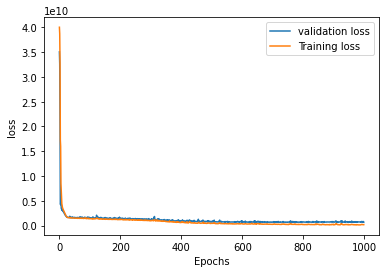

In [ ]:
h=hist.history
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


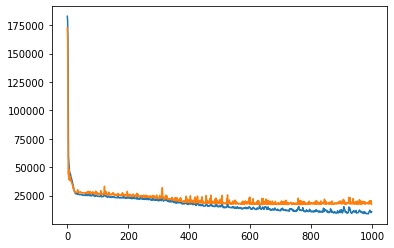

In [ ]:
plt.plot(h['mae'])
plt.plot(h['val_mae'])
plt.show()


In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
y_predicted.shape

(360, 1)

In [ ]:
y_predicted

array([[ 61378.508],
       [114593.53 ],
       [130358.44 ],
       [144274.62 ],
       [120534.92 ],
       [350625.94 ],
       [210035.25 ],
       [193488.17 ],
       [163949.53 ],
       [312939.22 ],
       [175837.5  ],
       [172689.52 ],
       [112401.69 ],
       [136392.16 ],
       [114523.64 ],
       [301136.03 ],
       [173899.36 ],
       [144831.78 ],
       [135688.86 ],
       [112748.625],
       [ 89647.945],
       [215287.14 ],
       [ 96987.266],
       [ 97413.09 ],
       [158235.86 ],
       [107999.03 ],
       [179121.56 ],
       [263156.97 ],
       [217649.7  ],
       [134638.14 ],
       [134607.17 ],
       [105231.195],
       [169876.58 ],
       [249507.86 ],
       [173930.77 ],
       [100930.47 ],
       [101692.22 ],
       [ 89401.5  ],
       [226423.39 ],
       [109105.94 ],
       [127912.05 ],
       [175465.05 ],
       [357147.6  ],
       [103007.34 ],
       [ 95438.95 ],
       [144165.94 ],
       [154214.83 ],
       [16129

In [ ]:
y_predicted=y_predicted.reshape((360,))

In [ ]:
labels=np.arange(1101,1461)

In [ ]:
df=pd.DataFrame({'Id':labels,'SalePrice':y_predicted})

In [ ]:
df.head(7)

,Id,SalePrice
0,1101,61378.507812
1,1102,114593.531250
2,1103,130358.437500
3,1104,144274.625000
4,1105,120534.921875
5,1106,350625.937500
6,1107,210035.250000


In [ ]:
df.to_csv('y_predicted_800-300-200-100-50-20-1_neuron_sckit_learn.csv',index=False)